<a href="https://colab.research.google.com/github/cristianquiroz6211/Introducci-n-a-regresi-n-lineal/blob/main/Regresion_lineal_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducci√≥n a regresi√≥n lineal
La regresi√≥n lineal es un enfoque estad√≠stico utilizado para modelar la relaci√≥n entre una variable dependiente y una o m√°s variables independientes. Su prop√≥sito principal es predecir el valor de la variable dependiente a partir de los valores de las variables independientes, asumiendo que hay una relaci√≥n lineal entre ellas.

¬øPor qu√© usar regresi√≥n lineal?
La regresi√≥n lineal es √∫til cuando se quiere entender c√≥mo una o m√°s variables afectan a una variable de inter√©s. Adem√°s, permite predecir resultados futuros bas√°ndose en datos hist√≥ricos. Se utiliza en diversas disciplinas, como econom√≠a, ingenier√≠a, biolog√≠a, marketing, entre otras.

https://www.linkedin.com/in/cristianquiroz1034916211/




## Importando datos

# üè°Sobre el Conjunto de Datos de Viviendas de Boston
Este conjunto de datos proviene del Repositorio de Aprendizaje Autom√°tico de UCI y se centra en los valores de las viviendas en los suburbios de Boston.


---


Contenido
El dataset contiene 506 instancias, cada una con 14 atributos que describen caracter√≠sticas de las propiedades y su entorno.

Descripci√≥n de los Atributos
A continuaci√≥n, se detalla la informaci√≥n de cada columna:

CRIM: Tasa de criminalidad per c√°pita por ciudad.

ZN: Proporci√≥n de terreno residencial zonificado para lotes de m√°s de 25,000 pies cuadrados.

INDUS: Proporci√≥n de acres de negocios no minoristas por ciudad.

CHAS: Variable ficticia para el r√≠o Charles (1 si el tramo limita con el r√≠o; 0 en caso contrario).

NOX: Concentraci√≥n de √≥xidos n√≠tricos (partes por 10 millones).

RM: N√∫mero medio de habitaciones por vivienda.

AGE: Proporci√≥n de unidades ocupadas por sus due√±os construidas antes de 1940.

DIS: Distancias ponderadas a cinco centros de empleo de Boston.

RAD: √çndice de accesibilidad a carreteras radiales.

TAX: Tasa de impuesto a la propiedad sobre el valor total por cada $10,000.

PTRATIO: Ratio de estudiantes por profesor en la ciudad.

B: Una m√©trica que representa la proporci√≥n de poblaci√≥n afroamericana en la ciudad.

LSTAT: Porcentaje de la poblaci√≥n considerada de "estatus inferior".

MEDV: Valor medio de las viviendas ocupadas por sus due√±os en miles de d√≥lares (esta es la variable objetivo).





---


Detalles Adicionales
Valores Faltantes: Ninguno.


---


Fuente: https://archive.ics.uci.edu/ml/datasets/Housing

https://www.kaggle.com/datasets/heptapod/uci-ml-datasets


In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

## Entendiendo los datos
Antes de trabajar con la regresion lineal, hay que entender los datos, para esto Nos vamos a apoyar de una IA, le hemos pasado los atributos anteriormente descritos y le hemos pedido que nos ayude a generar un grafico de correlacion para entender que datos tenemos.


---

Se muestra el codigo generado por el chatbot

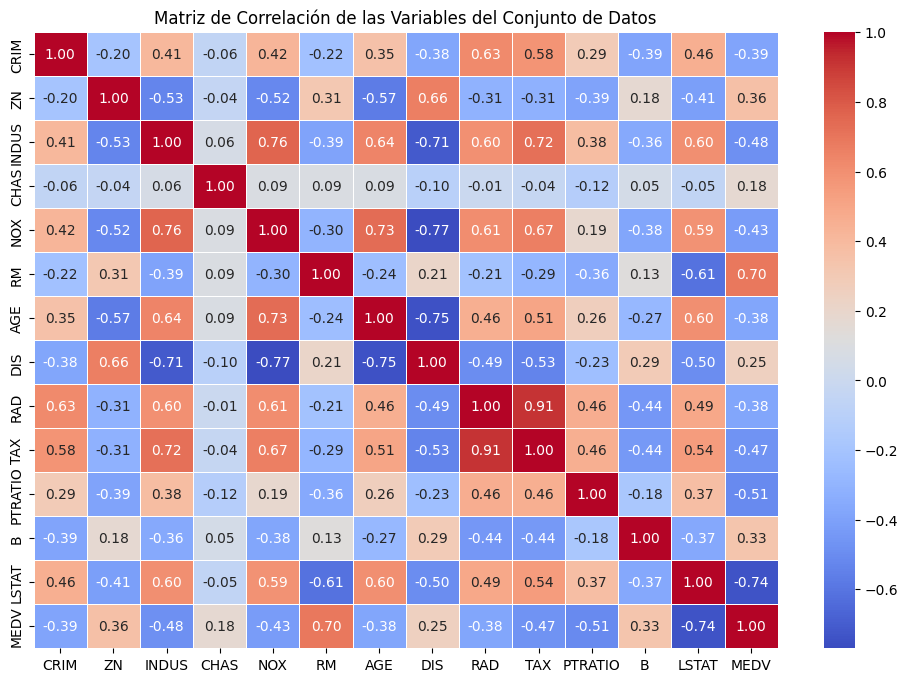

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlaci√≥n
correlation_matrix = df.corr()

# Crear el gr√°fico de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlaci√≥n de las Variables del Conjunto de Datos')
plt.show()


Aqu√≠ tienes la matriz de correlaci√≥n de las variables de tu conjunto de datos. Las correlaciones se muestran con valores entre -1 y 1, donde:

1 indica una correlaci√≥n positiva perfecta,

-1 indica una correlaci√≥n negativa perfecta,

0 indica que no hay correlaci√≥n.

En este gr√°fico, las variables que est√°n m√°s fuertemente correlacionadas entre s√≠ se muestran con colores m√°s intensos. Puedes observar que algunas variables, como RM (n√∫mero medio de habitaciones por vivienda) y MEDV (valor medio de las viviendas), presentan una fuerte correlaci√≥n positiva, lo que sugiere que a medida que aumenta el n√∫mero de habitaciones, tambi√©n tiende a aumentar el valor de las viviendas.

**Respuesta dada por ChatGPT**


---

Vamos a usar regresion lineal para predecir la variable MEDV, por lo cual vamos a reducir todas nuestras variables a las cuales tengas una mejor correlacion con nuestra variable objetivo.

In [12]:
# Correlaci√≥n de MEDV con otras variables
medv_correlations = correlation_matrix['MEDV'].sort_values(ascending=False)



correlation_positive = medv_correlations[medv_correlations > 0]
print("Correlaci√≥n de MEDV con otras variables:")
print(correlation_positive)

""" Voy a eliminar la variable CHAS ya que su correlaci√≥n es baja con MEDV """
# Seleccionar las columnas especificadas para la matriz de correlaci√≥n
selected_columns = ['MEDV', 'RM', 'ZN', 'B', 'DIS']

# Calcular la matriz de correlaci√≥n solo con las variables seleccionadas
correlation_matrix_selected = df[selected_columns].corr()

# Crear el gr√°fico de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlaci√≥n entre MEDV y otras Variables')
plt.show()




Correlaci√≥n de MEDV con otras variables:
MEDV    1.000000
RM      0.695360
ZN      0.360445
B       0.333461
DIS     0.249929
CHAS    0.175260
Name: MEDV, dtype: float64


Haciendo un analisis visual de los datos que tienen una correlacion > 1 con MEDV vemos que la variable que mas se correlaciona es RM. estando en 0.70 de un rango de [-1,1]


---
Con base a esto ya sabemos que la variable RM es la cual m√°s se correlaciona  y es la que vamos a usar para intentar predecir.


---

Vamos a usar scikit-learn para crear nuestro modelo.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


## Creando el modelo con scikit-learn
primero pasamos los valores de dataframe a numpy aaray de los datos que tenemos.


---
Para utilizar eficientemente scikit-learn, es una pr√°ctica com√∫n convertir los DataFrames de pandas a arrays de NumPy, aunque scikit-learn puede aceptar directamente los DataFrames. Los arrays de NumPy son la estructura de datos principal para las operaciones num√©ricas en Python, lo que permite un procesamiento m√°s r√°pido y eficiente.

---
pasa de ser <class 'pandas.core.frame.DataFrame'> a ser
<class 'numpy.ndarray'> utilizando [].values
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html


---


StandardScaler es una herramienta de preprocesamiento de datos de la biblioteca scikit-learn en Python. Su prop√≥sito es estandarizar las caracter√≠sticas de un conjunto de datos, lo que significa transformar los datos para que cada caracter√≠stica tenga una media de 0 y una desviaci√≥n est√°ndar de 1.

C√≥mo funciona
StandardScaler utiliza la siguiente f√≥rmula para estandarizar cada punto de datos (x):

z=(x‚àíŒº)/œÉ

donde:

x es el valor original.

Œº es la media de los valores de la caracter√≠stica.

œÉ es la desviaci√≥n est√°ndar de los valores de la caracter√≠stica.

Este proceso tambi√©n se conoce como normalizaci√≥n por Z-score. Al aplicar esta transformaci√≥n, se asegura que las caracter√≠sticas tengan la misma escala, lo cual es crucial para muchos algoritmos de aprendizaje autom√°tico.


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df[['RM']].values.reshape(-1,1)
y = df['MEDV'].values.reshape(-1,1)

sc_x = StandardScaler()
sc_y = StandardScaler()



X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)


LinearRegression()

Explicacion de que se hizo:


---
X = df[['RM']].values.reshape(-1,1):

Se selecciona la variable RM (n√∫mero medio de habitaciones por vivienda) como la caracter√≠stica independiente o predictor.

df[['RM']] extrae la columna RM del DataFrame df en formato DataFrame, pero luego .values convierte este DataFrame en un array de NumPy.

.reshape(-1,1) convierte el array 1D en una matriz 2D, con una columna y m√∫ltiples filas. Esto es necesario para que el modelo de regresi√≥n lineal pueda aceptar este formato de entrada.

y = df['MEDV'].values.reshape(-1,1):

Se selecciona la variable MEDV (valor medio de las viviendas) como la variable dependiente o la que se quiere predecir.

Al igual que con X, el valor de MEDV se convierte en un array de NumPy y se remodela en una matriz 2D con .reshape(-1,1).


---
sc_x = StandardScaler() y sc_y = StandardScaler():

Se crean dos objetos StandardScaler de sklearn.preprocessing, uno para las variables X (entrada) y otro para y (salida).

StandardScaler es una t√©cnica de normalizaci√≥n que estandariza las variables, restando la media y dividiendo por la desviaci√≥n est√°ndar, lo que permite que los datos tengan una distribuci√≥n con media 0 y desviaci√≥n est√°ndar 1.


---

X_std = sc_x.fit_transform(X):

fit_transform(X) ajusta el escalador a las caracter√≠sticas de X y luego las transforma. La transformaci√≥n consiste en restar la media de X y dividir por su desviaci√≥n est√°ndar, obteniendo la variable normalizada X_std.

y_std = sc_y.fit_transform(y):

De manera similar, fit_transform(y) ajusta el escalador de y a la variable y y luego la transforma. La transformaci√≥n para y tambi√©n consiste en centrar los datos y escalarlos.

---

slr = LinearRegression():

Se crea un objeto de regresi√≥n lineal utilizando la clase LinearRegression de sklearn.linear_model.

Este modelo ajusta una l√≠nea recta a los datos de entrada para predecir el valor de y a partir de X.

slr.fit(X_std, y_std):

Aqu√≠, el modelo de regresi√≥n lineal (slr) se ajusta a los datos estandarizados de X y y. Este paso permite al modelo aprender la relaci√≥n entre las caracter√≠sticas de entrada (X_std) y las etiquetas de salida (y_std) para hacer predicciones futuras.


---

Este c√≥digo est√° preparando y entrenando un modelo de regresi√≥n lineal en el que las variables de entrada y salida son normalizadas antes de ser usadas para el ajuste del modelo. La normalizaci√≥n es importante cuando las caracter√≠sticas tienen diferentes escalas o unidades, ya que asegura que el modelo no favorezca una variable sobre otra debido a diferencias en su magnitud. Este es un paso com√∫n en la regresi√≥n lineal y otros modelos de machine learning.



## An√°lisis de resultados

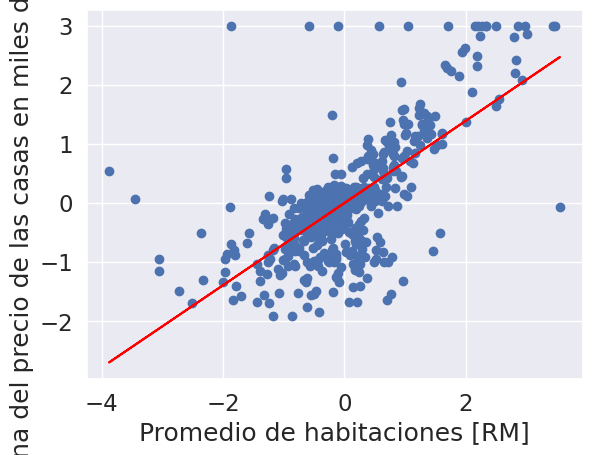

In [28]:
plt.scatter(X_std,y_std)
plt.plot(X_std,slr.predict(X_std),color='red')
plt.ylabel('Mediana del precio de las casas en miles de $ [MEDV]')
plt.xlabel('Promedio de habitaciones [RM]')
plt.show()


## Generando predicci√≥n con el modelo

Ya podemos usar nuestro modelo para hacer predicciones en base a el numero de habitaciones


In [32]:
num_habitaciones = 5
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))
print(f"{slr.predict(num_habitaciones_std)}, Despues de aplicar la transformada inversa queda {sc_y.inverse_transform(slr.predict(num_habitaciones_std))}")


[[-1.2726238]], Despues de aplicar la transformada inversa queda [[10.83992413]]


In [33]:
#Funcion de perdida
from sklearn.metrics import mean_squared_error, r2_score
y_pred = slr.predict(X_std)
mse = mean_squared_error(y_std, y_pred)
r2 = r2_score(y_std, y_pred)
print(f"MSE: {mse}")
print(f"R2: {r2}")

MSE: 0.5164745440086659
R2: 0.483525455991334


# Conclusiones

MSE (Error Cuadr√°tico Medio): 0.5165
El MSE mide la diferencia promedio al cuadrado entre los valores predichos por el modelo y los valores reales de la variable dependiente (en este caso, MEDV).

Interpretaci√≥n:

Un MSE bajo indica que el modelo est√° haciendo predicciones bastante cercanas a los valores reales.

Un MSE alto indica que el modelo est√° cometiendo errores significativos al predecir los valores de la variable dependiente.

En este caso, un MSE de 0.5165 sugiere que el modelo no est√° haciendo grandes errores en sus predicciones, pero todav√≠a hay margen de mejora.

2. R¬≤ (Coeficiente de Determinaci√≥n): 0.4835
El R¬≤ es una medida que indica qu√© tan bien el modelo explica la variabilidad de la variable dependiente. Su valor oscila entre 0 y 1:

R¬≤ = 1 significa que el modelo explica el 100% de la variabilidad de los datos.

R¬≤ = 0 significa que el modelo no explica nada de la variabilidad de los datos (es equivalente a predecir la media de los valores).

Interpretaci√≥n:

Un R¬≤ de 0.4835 indica que el modelo explica aproximadamente el 48.35% de la variabilidad en MEDV utilizando la variable RM.

Esto sugiere que m√°s de la mitad de la variabilidad de MEDV no est√° siendo capturada por el modelo, lo que implica que otros factores pueden estar influyendo en el valor de las viviendas y no solo el n√∫mero de habitaciones.

Resumen:
MSE (0.5165): El modelo tiene un error promedio moderado en sus predicciones. No es extremadamente bueno ni malo, pero hay espacio para mejorar.

R¬≤ (0.4835): El modelo captura aproximadamente el 48.35% de la variabilidad en los valores de las viviendas. Esto sugiere que hay otros factores que influyen en los valores de MEDV que no est√°n siendo considerados en este modelo, como otras variables adem√°s de RM.

En conclusi√≥n, el modelo es moderadamente efectivo, pero con una R¬≤ de 0.48, probablemente sea necesario agregar m√°s caracter√≠sticas o usar un enfoque m√°s complejo para mejorar su rendimiento.

## Regresi√≥n Lineal Multivariable

Ahora vamos a usar una regresi√≥n multivariable para intentar mejorar nuestra predicci√≥n. Utilizaremos las variables 'RM' (n√∫mero medio de habitaciones) y 'ZN' (proporci√≥n de terreno residencial zonificado) como variables independientes para predecir 'MEDV' (valor medio de las viviendas).

La regresi√≥n lineal multivariable (o m√∫ltiple) es una t√©cnica estad√≠stica que crea un modelo lineal para predecir el valor de una variable dependiente (respuesta) a partir de dos o m√°s variables independientes (predictores). A diferencia de la regresi√≥n lineal simple, que utiliza solo una variable predictora, la multivariable es m√°s adecuada para escenarios complejos donde varios factores pueden influir en el resultado.

Caracter√≠sticas Clave Variables: Consiste en una variable dependiente (Y) y m√∫ltiples variables independientes (X_1,X_2, \dots,X_p). Por ejemplo, el precio de una vivienda (Y) puede depender de su tama√±o (X_1), el n√∫mero de habitaciones (X_2) y la ubicaci√≥n (X_3).

Ecuaci√≥n del modelo: Se representa por la f√≥rmula: Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p + \epsilon Donde  Œ≤0  es el intercepto,  Œ≤1  a  Œ≤p  son los coeficientes que indican el impacto de cada variable independiente en Y, y  œµ  es el t√©rmino de error.

Objetivos:

Predicci√≥n: Permite predecir el valor de la variable dependiente al conocer los valores de las variables independientes.

An√°lisis de la influencia: Ayuda a entender y cuantificar el impacto individual de cada variable independiente sobre la dependiente, manteniendo las dem√°s constantes.



In [ ]:
X_multi = df[['RM','ZN']]
y_multi = df['MEDV'].values.reshape(-1,1)

multi_sc_y = StandardScaler()
multi_sc_x = StandardScaler()



X_multi_std = multi_sc_x.fit_transform(X_multi)
y_multi_std = multi_sc_y.fit_transform(y_multi)

multi_slr = LinearRegression()
multi_slr.fit(X_multi_std, y_multi_std)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x1_range = np.arange(df['RM'].min(), df['RM'].max())
x2_range = np.arange(df['ZN'].min(), df['ZN'].max())

x1,x2 = np.meshgrid(x1_range,x2_range)
plano = pd.DataFrame({'RM':x1.ravel(),'ZN':x2.ravel()})
# Use .values to convert the DataFrame to a NumPy array for prediction
pred = multi_slr.predict(plano.values).reshape(x1.shape)
pred = multi_sc_y.inverse_transform(pred)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1,x2,pred,alpha= 0.4)
ax.scatter(df['RM'],df['ZN'],df['MEDV'],color='red',marker='.')

ax.view_init(elev=20,azim= 120) # Adjusted viewing angle
ax.set_xlabel('RM')
ax.set_ylabel('ZN')
ax.set_zlabel('MEDV')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

y_multi_pred = multi_slr.predict(X_multi_std)
mse_multi = mean_squared_error(y_multi_std, y_multi_pred)
print(f"Mean Squared Error (Multiple Regression): {mse_multi}")

#calcular r^2
from sklearn.metrics import r2_score
r2_multi = r2_score(y_multi_std, y_multi_pred)
print(f"R^2 (Multiple Regression): {r2_multi}")